<div style="text-align: right;"><h4>ФБ-24 Цадзікідзе Арсен</h4></div>
<h1><center>Лабораторна робота №2</center></h1>
<h3><center>З предмета "Засоби підготовки та аналізу даних"</center></h3>

In [34]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete") #Setting up the coding environment

Setup Complete


<p><h4>Для кожної із адміністративних одиниць України завантажити тестові
структуровані файли, що містять значення VHI-індексу. Ця процедура
має бути автоматизована, параметром процедури має бути індекс
(номер) області. При зберіганні файлу до його імені потрібно додати
дату та час завантаження</h4></p>

In [35]:
import os
import urllib
import datetime

def download_data(province_id, year1=1981, year2=2024):
    # Checking the existence of the data folder
    data_folder = 'data'
    if not os.path.exists(data_folder):
        os.makedirs(data_folder)
    else:
        # Checking the existence of an already downloaded file
        existing_files = [f for f in os.listdir(data_folder) if f.startswith(f'vhi_id_{province_id}_')]
        if existing_files:
            print(f"File '{existing_files[0]}' already exists in the 'data' folder. Nothing to download.")
            return

    # Loading data
    url = f"https://www.star.nesdis.noaa.gov/smcd/emb/vci/VH/get_TS_admin.php?country=UKR&provinceID={province_id}&year1={year1}&year2={year2}&type=Mean"
    vhi_url = urllib.request.urlopen(url)

    # Writing to a file
    current_datetime = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M')
    filename = f'vhi_id_{province_id}_{current_datetime}.csv'
    file_path = os.path.join(data_folder, filename)

    with open(file_path, 'wb') as out:
        out.write(vhi_url.read())

    print(f"VHI is downloaded and saved in '{file_path}'")

# Example of a function call
for province_id in range(1, 28):
    download_data(province_id)

File 'vhi_id_1_2024-03-05_03-52.csv' already exists in the 'data' folder. Nothing to download.
File 'vhi_id_2_2024-03-05_03-52.csv' already exists in the 'data' folder. Nothing to download.
File 'vhi_id_3_2024-03-05_03-52.csv' already exists in the 'data' folder. Nothing to download.
File 'vhi_id_4_2024-03-05_03-52.csv' already exists in the 'data' folder. Nothing to download.
File 'vhi_id_5_2024-03-05_03-52.csv' already exists in the 'data' folder. Nothing to download.
File 'vhi_id_6_2024-03-05_03-52.csv' already exists in the 'data' folder. Nothing to download.
File 'vhi_id_7_2024-03-05_03-52.csv' already exists in the 'data' folder. Nothing to download.
File 'vhi_id_8_2024-03-05_03-52.csv' already exists in the 'data' folder. Nothing to download.
File 'vhi_id_9_2024-03-05_03-52.csv' already exists in the 'data' folder. Nothing to download.
File 'vhi_id_10_2024-03-05_03-52.csv' already exists in the 'data' folder. Nothing to download.
File 'vhi_id_11_2024-03-05_03-52.csv' already exi

<p><h4>Зчитати завантажені текстові файли у фрейм (детальніше про роботу
із фреймами буде розказано у подальших лабораторних роботах).
Імена стовбців фрейму мають бути змістовними та легкими для
сприйняття (не повинно бути спеціалізованих символів, пробілів
тощо). Ця задача має бути реалізована у вигляді окремої процедури,
яка на вхід приймає шлях до директорії, в якій зберігаються файли</h4></p>

In [5]:
def data_cleaning(dir_path):
    # List to store DataFrames from individual CSV files
    all_dfs = []

    if not os.path.exists(dir_path) or not os.path.isdir(dir_path):
        print(f"Directory {dir_path} does not exist or is not a directory.")
        return None
    else:
        files = os.listdir(dir_path)

        # Loop through each file in the directory
        for i, file in enumerate(files):
            if file.endswith(".csv"):
                filePath = os.path.join(dir_path, file)
                df = pd.read_csv(filePath, index_col=False, header=1)
                df["ID"] = i + 1
                all_dfs.append(df)

        df = pd.concat(all_dfs).drop_duplicates().reset_index(drop=True)
        
    # Made some operations dedicated to Data Cleaning
    df.columns = [col.replace(" ", "").replace("<br>", "") for col in df.columns]
    df["year"] = df["year"].str.replace(r'<tt>|<pre>', '', regex=True)
    df = df.drop(df.loc[df['VHI'] == -1].index)
    df = df.loc[(df['ID'] != 12) & (df['ID'] != 20)]
    df = df.drop(60398)
    return df
    

# Example of a function call
data_cleaning("data")
# df = data_cleaning("data")
# df_original = df.copy()

,year,week,SMN,SMT,VCI,TCI,VHI,ID
0,1982,1.0,0.059,258.24,51.11,48.78,49.95,1
1,1982,2.0,0.063,261.53,55.89,38.20,47.04,1
2,1982,3.0,0.063,263.45,57.30,32.69,44.99,1
3,1982,4.0,0.061,265.10,53.96,28.62,41.29,1
4,1982,5.0,0.058,266.42,46.87,28.57,37.72,1
...,...,...,...,...,...,...,...,...
60350,2024,5.0,0.101,275.13,58.55,8.77,33.66,27
60351,2024,6.0,0.110,276.43,60.83,9.08,34.96,27
60352,2024,7.0,0.120,277.97,61.35,10.45,35.90,27
60353,2024,8.0,0.130,279.15,60.18,13.87,37.02,27


<p><h4>Реалізувати процедуру, яка змінить індекси областей, які використані
на порталі NOAA на методичні</h4></p>

In [37]:
def ID_replace(df):
    index_mapping = {
        1: 22,
        2: 24,
        3: 23,
        4: 25,
        5: 3,
        6: 4,
        7: 8,
        8: 19,
        9: 20,
        10: 21,
        11: 9,
        13: 10,
        14: 11,
        15: 12,
        16: 13,
        17: 14,
        18: 15,
        19: 16,
        21: 17,
        22: 18,
        23: 6,
        24: 1,
        25: 2,
        26: 7,
        27: 5,
    }
    df['ID'] = df['ID'].replace(index_mapping)
    return df

ID_replace(data_cleaning("data"))

,year,week,SMN,SMT,VCI,TCI,VHI,ID
0,1982,1.0,0.059,258.24,51.11,48.78,49.95,22
1,1982,2.0,0.063,261.53,55.89,38.20,47.04,22
2,1982,3.0,0.063,263.45,57.30,32.69,44.99,22
3,1982,4.0,0.061,265.10,53.96,28.62,41.29,22
4,1982,5.0,0.058,266.42,46.87,28.57,37.72,22
...,...,...,...,...,...,...,...,...
60350,2024,5.0,0.101,275.13,58.55,8.77,33.66,5
60351,2024,6.0,0.110,276.43,60.83,9.08,34.96,5
60352,2024,7.0,0.120,277.97,61.35,10.45,35.90,5
60353,2024,8.0,0.130,279.15,60.18,13.87,37.02,5


<p><h4>Ряд VHI для області за вказаний рік, пошук екстремумів (min та max)</h4></p>

VHI for Region 20 in the year 1999 with 'week' in decimal format:
       week    VHI
18780   1.0  47.07
18781   2.0  45.98
18782   3.0  48.06
18783   4.0  52.07
18784   5.0  54.75
18785   6.0  52.04
18786   7.0  46.85
18787   8.0  42.34
18788   9.0  39.70
18789  10.0  39.32
18790  11.0  39.50
18791  12.0  42.20
18792  13.0  46.01
18793  14.0  48.63
18794  15.0  50.75
18795  16.0  52.63
18796  17.0  58.26
18797  18.0  62.58
18798  19.0  63.09
18799  20.0  62.84
18800  21.0  59.50
18801  22.0  55.10
18802  23.0  51.30
18803  24.0  46.59
18804  25.0  42.56
18805  26.0  38.47
18806  27.0  35.97
18807  28.0  34.75
18808  29.0  36.64
18809  30.0  41.84
18810  31.0  47.85
18811  32.0  52.89
18812  33.0  55.65
18813  34.0  55.67
18814  35.0  55.73
18815  36.0  50.57
18816  37.0  40.68
18817  38.0  32.96
18818  39.0  29.94
18819  40.0  31.24
18820  41.0  33.06
18821  42.0  37.17
18822  43.0  38.22
18823  44.0  34.79
18824  45.0  35.24
18825  46.0  37.33
18826  47.0  39.29
18827  48.0  42.14
188

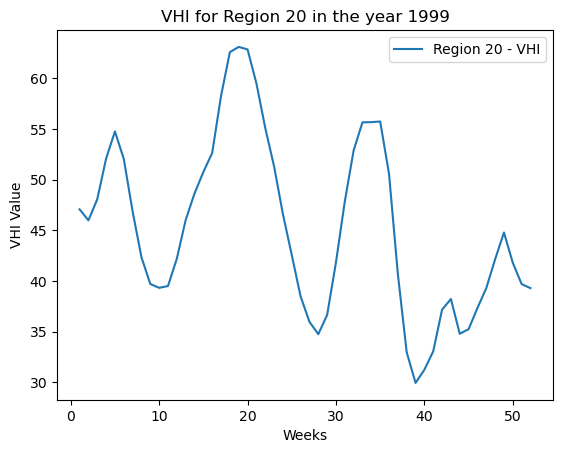

In [57]:
def analyze_vhi(df, region_id, year):
    # Select data for a specific region and year
    selected_data = df[(df['ID'] == region_id) & (df['year'] == str(year))]
    
    if selected_data.empty:
        print(f"No data found for Region {region_id} in the year {year}")
        return
    
    # Output the string VHI
    vhi_data = selected_data['VHI']
    print(f"VHI for Region {region_id} in the year {year} with 'week' in decimal format:")
    print(selected_data[['week', 'VHI']])
    
    # Finding the minimum and maximum
    vhi_min = vhi_data.min()
    vhi_max = vhi_data.max()
    print(f"Minimum VHI: {vhi_min}")
    print(f"Maximum VHI: {vhi_max}")
    
    # Vizualization
    plt.plot(selected_data['week'], vhi_data, label=f"Region {region_id} - VHI")
    plt.title(f"VHI for Region {region_id} in the year {year}")
    plt.xlabel("Weeks")
    plt.ylabel("VHI Value")
    plt.legend()

# Example of a function call
df_cleaned = data_cleaning("data")
df_with_replaced_id = ID_replace(df_cleaned)
analyze_vhi(df_with_replaced_id, region_id=20, year=1999)

In [58]:
def region_year_analysis(df, region_id, years=("2020", "2024")):
    df2 = df[(df["year"].between(years[0], years[1])) & (df['ID'] == region_id)]
    vhi_max_reg = df2["VHI"].max()
    vhi_min_reg = df2["VHI"].min()
    print(f"[+] {region_id}: min {vhi_min_reg} max {vhi_max_reg}")

# Example of function calls chaining
df_cleaned = data_cleaning("data")
df_with_replaced_id = ID_replace(df_cleaned)
region_year_analysis(df_with_replaced_id, 15)

[+] 15: min 18.27 max 82.61


<p><h4>Ряд VHI за вказаний діапазон років для вказаних областей;
виявити роки, протягом яких екстремальні посухи торкнулися
більше вказаного відсотка областей по Україні</h4></p>

In [59]:
def region_year_analysis(df, region_id, years=("1999", "2024"), percent=0):
    df2 = df[(df["year"].between(years[0], years[1])) & (df['ID'] == region_id)]
    high_vhi_data = df2[df2["VHI"] > percent]

    if not high_vhi_data.empty:
        result = high_vhi_data[["year", "VHI"]]
        print(result)
        
# Example of a function call
df_cleaned = data_cleaning("data")
df_with_replaced_id = ID_replace(df_cleaned)
result = region_year_analysis(df_with_replaced_id, 22, percent=60)

      year    VHI
886   1999  62.60
887   1999  65.50
888   1999  65.08
889   1999  63.78
890   1999  62.72
...    ...    ...
2159  2023  65.48
2160  2023  64.98
2161  2023  64.11
2162  2023  62.96
2163  2023  60.42

[181 rows x 2 columns]
